In [11]:
import pandas as pd
from datasets import load_dataset, Dataset

In [10]:
#list of first 500 dyda utterances
ds = load_dataset("silicone", "dyda_da")
true_labels = ds['train'][0:500]['Dialogue_Act']
true_labels

Found cached dataset silicone (/home/dck5549/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)
100%|██████████| 3/3 [00:00<00:00, 736.36it/s]


['directive',
 'commissive',
 'question',
 'question',
 'question',
 'directive',
 'commissive',
 'inform',
 'directive',
 'commissive',
 'question',
 'inform',
 'question',
 'question',
 'inform',
 'inform',
 'question',
 'inform',
 'question',
 'inform',
 'inform',
 'question',
 'inform',
 'inform',
 'inform',
 'question',
 'inform',
 'question',
 'inform',
 'inform',
 'question',
 'inform',
 'directive',
 'commissive',
 'question',
 'inform',
 'question',
 'question',
 'inform',
 'inform',
 'inform',
 'inform',
 'question',
 'inform',
 'question',
 'question',
 'inform',
 'question',
 'inform',
 'question',
 'inform',
 'inform',
 'inform',
 'question',
 'inform',
 'inform',
 'inform',
 'question',
 'inform',
 'inform',
 'question',
 'inform',
 'inform',
 'inform',
 'question',
 'inform',
 'question',
 'inform',
 'question',
 'inform',
 'inform',
 'inform',
 'inform',
 'question',
 'inform',
 'inform',
 'question',
 'inform',
 'question',
 'inform',
 'inform',
 'inform',
 'question',

In [13]:
gpt_labels = pd.read_csv('gpt_dyda_results.csv')
gpt_labels

,Unnamed: 0,preds,explanations
0,0,directive,The first utterance is classified as a directi...
1,1,inform,The second utterance is classified as informat...
2,2,question,"The third utterance, ""What do you mean? It wil..."
3,3,question,The fourth utterance is classified as a questi...
4,4,question,"The fifth utterance, ""I guess you are right. B..."
...,...,...,...
495,495,commissive,The utterance expresses an emotional reaction ...
496,496,question,The use of question marks and the repetition o...
497,497,inform,The utterance expresses the speaker's disbelie...
498,498,question,"The utterance ""what is it? why did you buy a b..."


In [15]:
gpt_labels['preds'].value_counts()

preds
inform        247
question      117
directive      87
commissive     45
commisive       2
greeting        2
Name: count, dtype: int64

In [16]:
#clean this up, idk where greeting came from lol

gpt_labels[gpt_labels['preds'] == 'commisive'] = 'commissive'
#just make greeting the most common class
gpt_labels[gpt_labels['preds'] == 'greeting'] = 'inform'

gpt_labels['preds'].value_counts()

preds
inform        249
question      117
directive      87
commissive     47
Name: count, dtype: int64

In [18]:
print(len(gpt_labels['preds']), len(true_labels))

500 500


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

true_labels = pd.DataFrame(true_labels)[0]
model_predictions = gpt_labels['preds']

# Ensure that both DataFrames have the same length and index
assert len(true_labels) == len(model_predictions), "Lengths of true_labels and model_predictions should be the same."
assert true_labels.index.equals(model_predictions.index), "Indices of true_labels and model_predictions should be the same."

# Convert string labels to numerical labels if needed (depends on the specific metrics you want to compute)
# For example, if using precision, recall, and F1-score, numerical labels are required
label_mapping = {label: idx for idx, label in enumerate(true_labels.unique())}
true_labels_numeric = true_labels.map(label_mapping)
model_predictions_numeric = model_predictions.map(label_mapping)

# Compute evaluation metrics
accuracy = accuracy_score(true_labels, model_predictions)
precision = precision_score(true_labels_numeric, model_predictions_numeric, average='weighted')
recall = recall_score(true_labels_numeric, model_predictions_numeric, average='weighted')
f1 = f1_score(true_labels_numeric, model_predictions_numeric, average='weighted')

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, model_predictions))

# Compute and display confusion matrix with columns
conf_matrix = confusion_matrix(true_labels, model_predictions, labels=true_labels.unique())
conf_matrix_df = pd.DataFrame(conf_matrix, index=true_labels.unique(), columns=true_labels.unique())
print("\nConfusion Matrix:")
print(conf_matrix_df)

# Calculate accuracy for each class
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
class_accuracies_df = pd.DataFrame({'Accuracy': class_accuracies}, index=true_labels.unique())
print("\nAccuracy for Each Class:")
print(class_accuracies_df)

Accuracy: 0.7020
Precision: 0.7518
Recall: 0.7020
F1-score: 0.7207

Classification Report:
              precision    recall  f1-score   support

  commissive       0.23      0.28      0.26        39
   directive       0.32      0.55      0.41        51
      inform       0.83      0.78      0.80       266
    question       0.90      0.73      0.80       144

    accuracy                           0.70       500
   macro avg       0.57      0.58      0.57       500
weighted avg       0.75      0.70      0.72       500


Confusion Matrix:
            directive  commissive  question  inform
directive          28           8         6       9
commissive         10          11         3      15
question           20           1       105      18
inform             29          27         3     207

Accuracy for Each Class:
            Accuracy
directive   0.549020
commissive  0.282051
question    0.729167
inform      0.778195


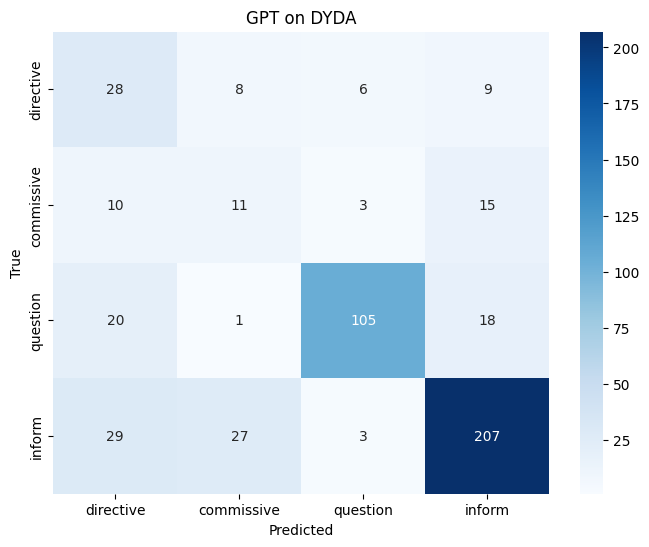

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns






# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=true_labels.unique(), yticklabels=true_labels.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GPT on DYDA')
plt.show()